In [536]:
import random
random.seed(11853069)


In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set()

In [506]:
data = pd.read_csv("/content/musicData.csv")
data.head(10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic


*data cleaning*

In [507]:
data.shape


(50005, 18)

In [508]:
data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [509]:
data.dropna(inplace=True)
data.shape

(50000, 18)

In [510]:
print(data["artist_name"].value_counts())
print(data["track_name"].value_counts())

empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Ward Davis                    1
A.A. Bondy                    1
Iris DeMent                   1
Mac Davis                     1
Millonario                    1
Name: artist_name, Length: 6863, dtype: int64
Home               16
Forever            15
Without You        14
Summertime         13
Fire               13
                   ..
Build               1
In My Home          1
Fire Water Burn     1
Bitter End          1
Hip Hop Hooray      1
Name: track_name, Length: 41699, dtype: int64


dropping obtained date and instance ID since they are completely unrelated to genre.

I will drop artist and track name as well because there is more than 6800 unique instances for artist and almost 42000 unique values for song title, encoding these would result in way too many features when performing dimenstionality reduction.

In [511]:
data = data.drop(columns = ["instance_id", "obtained_date", "track_name", "artist_name"])
data.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,0.323,Electronic
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,0.614,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,0.230,Electronic
7,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,0.761,Electronic
8,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,0.273,Electronic
9,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,0.203,Electronic


In [512]:
data.shape

(50000, 14)

I noticed that there is a question mark where tempo values are missing, checking to see how many there are in the dataset:

In [513]:
data["tempo"].value_counts()

?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: tempo, Length: 29394, dtype: int64

there is essentially 5000 NaN values, which is almost 10% of the dataset, so dropping it all would be losing too much. I will be imputting the missing values instead

In [514]:
data['tempo'].replace("?", float("NaN"), inplace=True) # convert the ? to NaN
# convert the specific column to a numeric data type, so we can calculate the median
data['tempo'] = pd.to_numeric(data['tempo'], errors='coerce')
data["tempo"].value_counts()

140.007    17
120.000    17
100.003    16
100.002    15
130.016    15
           ..
137.046     1
136.378     1
93.041      1
113.982     1
99.201      1
Name: tempo, Length: 29393, dtype: int64

check to see which columns have NaN values

In [515]:
total = data.isna().sum().sum()
nan = data.isna().any()

print(total)
print(nan)

4980
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo                True
valence             False
music_genre         False
dtype: bool


In [516]:
data.describe(include='all')

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,45020.000000,50000.000000,50000
unique,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,Major,NaN,NaN,NaN,Electronic
freq,NaN,NaN,NaN,NaN,NaN,NaN,5727,NaN,NaN,32099,NaN,NaN,NaN,5000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,NaN,0.193896,-9.133761,NaN,0.093586,119.952961,0.456264,NaN
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,NaN,0.161637,6.162990,NaN,0.101373,30.641701,0.247119,NaN
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,NaN,0.009670,-47.046000,NaN,0.022300,34.347000,0.000000,NaN
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,NaN,0.096900,-10.860000,NaN,0.036100,94.941500,0.257000,NaN
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,NaN,0.126000,-7.276500,NaN,0.048900,119.879000,0.448000,NaN
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,NaN,0.244000,-5.173000,NaN,0.098525,140.471250,0.648000,NaN


key and mode are both categorical data, and need to be encoded


In [517]:
data["key"].value_counts()

G     5727
C     5522
C#    5405
D     5265
A     4825
F     4341
B     3789
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: key, dtype: int64

In [518]:
encoded = pd.get_dummies(data['key'], prefix='key', drop_first=True)
data.drop('key', axis=1, inplace=True)
data = pd.concat([data, encoded], axis=1)

In [519]:
data.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,27.0,0.00468,0.652,-1.0,0.941,0.792000,0.1150,-5.201,Minor,0.0748,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.1240,-7.043,Minor,0.0300,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,0.5340,-4.617,Major,0.0345,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.1570,-4.498,Major,0.2390,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.1570,-6.266,Major,0.0413,...,0,0,0,0,0,0,0,1,0,0
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,0.2160,-10.517,Minor,0.0412,...,0,0,0,1,0,0,0,0,0,0
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.1060,-4.294,Major,0.3510,...,1,0,0,0,0,0,0,0,0,0
7,43.0,0.02970,0.809,416132.0,0.706,0.903000,0.0635,-9.339,Minor,0.0484,...,0,0,0,0,0,0,0,0,1,0
8,39.0,0.00299,0.509,292800.0,0.921,0.000276,0.1780,-3.175,Minor,0.2680,...,0,0,0,0,0,0,1,0,0,0
9,22.0,0.00934,0.578,204800.0,0.731,0.011200,0.1110,-7.091,Minor,0.1730,...,0,0,0,0,0,0,0,0,0,0


In [520]:
data['mode'] = data['mode'].map({'Major': 1, 'Minor': 0})
data.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,27.0,0.00468,0.652,-1.0,0.941,0.792000,0.1150,-5.201,0,0.0748,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.1240,-7.043,0,0.0300,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,0.5340,-4.617,1,0.0345,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.1570,-4.498,1,0.2390,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.1570,-6.266,1,0.0413,...,0,0,0,0,0,0,0,1,0,0
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,0.2160,-10.517,0,0.0412,...,0,0,0,1,0,0,0,0,0,0
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.1060,-4.294,1,0.3510,...,1,0,0,0,0,0,0,0,0,0
7,43.0,0.02970,0.809,416132.0,0.706,0.903000,0.0635,-9.339,0,0.0484,...,0,0,0,0,0,0,0,0,1,0
8,39.0,0.00299,0.509,292800.0,0.921,0.000276,0.1780,-3.175,0,0.2680,...,0,0,0,0,0,0,1,0,0,0
9,22.0,0.00934,0.578,204800.0,0.731,0.011200,0.1110,-7.091,0,0.1730,...,0,0,0,0,0,0,0,0,0,0


In [521]:
from sklearn.model_selection import train_test_split

train = pd.DataFrame()
test = pd.DataFrame()

# Get unique genres
genres = data['music_genre'].unique()

# For each genre, randomly select 500 samples for the train set and the rest for the test set
for genre in genres:
    genre_data = data[data['music_genre'] == genre]
    train_data, test_data = train_test_split(genre_data, test_size=500, random_state=11853069)
    train = pd.concat([train, train_data])
    test = pd.concat([test, test_data])

# Reset index for the train and test sets
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

imputting tempo after train test split to avoid data leakage

In [522]:
train['tempo'].fillna(train['tempo'].median(), inplace=True)
test['tempo'].fillna(test['tempo'].median(), inplace=True)


In [523]:
train["tempo"].value_counts()

119.878    4514
119.985      14
120.019      13
130.016      13
140.001      13
           ... 
171.392       1
166.813       1
103.499       1
162.015       1
84.972        1
Name: tempo, Length: 27284, dtype: int64

In [524]:
test["tempo"].value_counts()

119.888    470
120.015      4
100.003      4
100.002      4
120.000      4
          ... 
96.071       1
137.639      1
126.717      1
105.107      1
157.990      1
Name: tempo, Length: 4242, dtype: int64

In [525]:
train.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
music_genre          object
key_A#                uint8
key_B                 uint8
key_C                 uint8
key_C#                uint8
key_D                 uint8
key_D#                uint8
key_E                 uint8
key_F                 uint8
key_F#                uint8
key_G                 uint8
key_G#                uint8
dtype: object

In [526]:
# standardize numerical columns
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['float64']).columns
scaler.fit(train[numerical_cols])

# Apply the scaler to the numerical columns of the DataFrame
train[numerical_cols] = scaler.transform(train[numerical_cols])

train.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,-0.786205,-0.854210,0.950075,0.209751,1.141159,-0.552724,1.031402,1.374625,1,1.012810,...,0,0,1,0,0,0,0,0,0,0
1,-0.014394,0.305232,1.229952,-0.228250,0.408637,-0.557154,0.876885,0.627594,0,0.826091,...,0,0,0,0,0,0,0,0,0,0
2,0.178558,-0.826681,0.093652,0.514289,-0.089780,2.264125,-0.482861,-0.104387,0,-0.633260,...,0,0,0,0,0,0,1,0,0,0
3,-0.335982,-0.894215,0.144030,0.364238,1.499868,-0.436242,0.122844,1.327531,0,-0.017089,...,1,0,0,0,0,0,0,0,0,0
4,-1.107793,-0.867096,-0.449309,-0.473223,0.865519,-0.319022,0.747091,0.850279,1,-0.269650,...,0,0,1,0,0,0,0,0,0,0
5,-1.107793,-0.749365,1.481841,1.108162,0.465275,-0.551893,-0.464319,0.258448,1,3.980648,...,0,1,0,0,0,0,0,0,0,0
6,-0.464617,-0.470853,0.261578,0.928630,1.261987,-0.557148,1.136473,0.543601,1,0.757300,...,0,0,0,0,0,0,0,1,0,0
7,-0.721888,-0.898370,0.323151,0.287045,1.503644,1.799552,3.719990,1.038008,1,-0.157620,...,0,0,0,0,0,0,0,0,1,0
8,-0.721888,-0.438638,0.317554,0.011991,-0.962010,2.057990,-0.713400,-0.813872,0,1.651583,...,0,0,0,0,0,0,0,0,1,0
9,-0.207347,-0.745265,1.056428,0.167450,1.092072,-0.555628,-0.458138,0.508483,1,-0.042640,...,0,0,0,0,0,0,0,0,0,1


In [527]:
test[numerical_cols] = scaler.transform(test[numerical_cols])
test.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,-1.429381,-0.145776,0.838124,0.037309,-1.086614,1.018085,-0.482861,-0.463661,1,1.160219,...,0,0,0,1,0,0,0,0,0,0
1,0.371511,-0.668242,0.283968,-0.095689,1.450781,-0.464240,1.099389,0.691681,1,6.683150,...,1,0,0,0,0,0,0,0,0,0
2,-0.464617,-0.894273,0.345541,-1.722613,0.200963,0.907326,-0.575571,0.074441,1,-0.521229,...,0,0,0,1,0,0,0,0,0,0
3,0.242876,-0.895005,0.524662,-0.260939,0.544569,-0.510082,-0.087298,0.037866,0,-0.679448,...,0,0,1,0,0,0,0,0,0,0
4,-0.528935,-0.887977,1.308317,-0.120859,1.235556,0.815027,4.813968,0.638113,1,-0.418042,...,0,0,0,0,1,0,0,0,0,0


In [528]:
X_train, y_train = (train.drop('music_genre', axis=1),train['music_genre'])
X_test, y_test = (test.drop('music_genre', axis=1),test['music_genre'])

t-sne

principal component analysis 

In [529]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

print("Number of Principal Components: ", pca.n_components_)

Number of Principal Components:  23


In [530]:
eigenvalues = pca.explained_variance_
count = np.sum(eigenvalues > 1)

explained_variance_ratio = pca.explained_variance_ratio_
variance_explained = np.sum(explained_variance_ratio[:3]) * 100

print(f'# of eigenvalues above 1: {count}')
print(f'variance explained by the first three components: {variance_explained:.2f}%')

# of eigenvalues above 1: 3
variance explained by the first three components: 50.45%


In [531]:
variance_explained = np.sum(explained_variance_ratio[:10]) * 100
print(f'variance explained by the first ten components: {variance_explained:.2f}%')

variance explained by the first ten components: 90.44%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

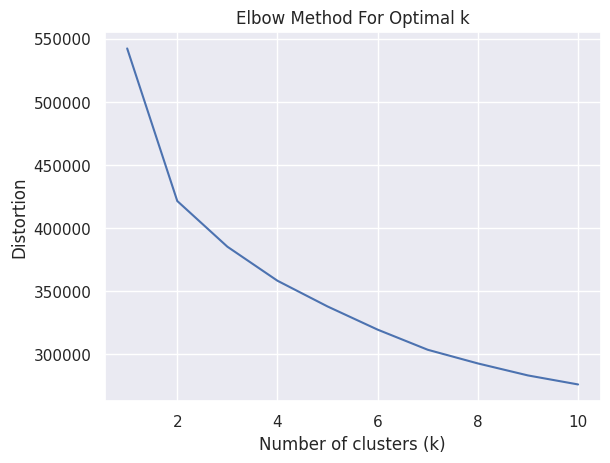

In [532]:
from sklearn.cluster import KMeans

distortions = []

# test k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=11853069)
    kmeans.fit(X_train_pca)
    distortions.append(kmeans.inertia_)

# plot the elbow graph
plt.plot(range(1, 11), distortions)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

Since we know there are 10 genres, despite the elbow method yielding two as the optimal number of clusters, I will be using 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


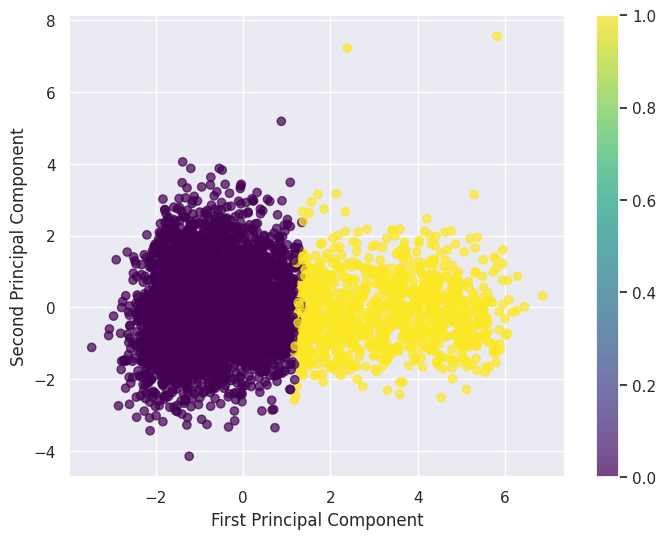

In [533]:
kmeans = KMeans(n_clusters=2, random_state=11853069) 
kmeans.fit(X_train_pca)

y_pred = kmeans.predict(X_test_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha = 0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


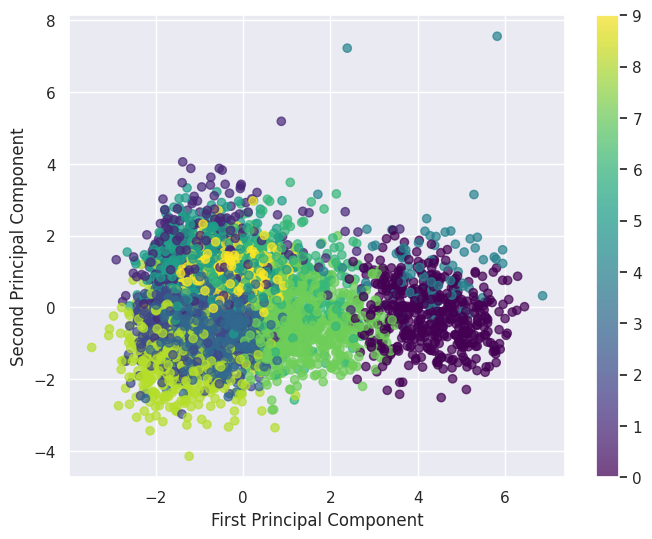

In [534]:
kmeans = KMeans(n_clusters=10, random_state=11853069) 
kmeans.fit(X_train_pca)

y_pred = kmeans.predict(X_test_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha = 0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

In [535]:
explained_variance = pca.explained_variance_

np.set_printoptions(suppress=True, precision=10)
print(explained_variance)

[3.6980024982 1.3326403419 1.0500772693 0.9796559285 0.9517316934
 0.8344664997 0.738175885  0.5986929155 0.4592184897 0.2581118367
 0.2330402779 0.1127386906 0.1122650566 0.1066148908 0.1051843767
 0.0877334422 0.0797273084 0.0753295447 0.0698728267 0.0650081193
 0.0626666818 0.0340787256 0.0078041218]


In [538]:
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, auc

X_train_pca = X_train_pca[:, :8]
X_test_pca = X_test_pca[:, :8]

model = xgb.XGBClassifier()
model.fit(X_train_pca, y_train)

y_pred = model.predict_proba(X_test_pca)


In [539]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (5000,)
Shape of y_pred: (5000, 10)


In [540]:
roc_auc_scores = []
for class_index in range(len(model.classes_)):
    y_true_binary = np.where(y_test == model.classes_[class_index], 1, 0)
    y_pred_binary = y_pred[:, class_index]
    roc_auc = roc_auc_score(y_true_binary, y_pred_binary)
    roc_auc_scores.append(roc_auc)

# Print the ROC AUC scores for each class
for class_index, roc_auc in enumerate(roc_auc_scores):
    print(f"Class {model.classes_[class_index]}: ROC AUC = {roc_auc}")

macro_roc_auc = np.mean(roc_auc_scores)
print("Overall ROC AUC (Macro-average):", macro_roc_auc)


Class 0: ROC AUC = 0.832924
Class 1: ROC AUC = 0.9482586666666666
Class 2: ROC AUC = 0.8951911111111112
Class 3: ROC AUC = 0.9738235555555557
Class 4: ROC AUC = 0.8753204444444445
Class 5: ROC AUC = 0.9001508888888888
Class 6: ROC AUC = 0.9097102222222223
Class 7: ROC AUC = 0.8777195555555554
Class 8: ROC AUC = 0.9005268888888888
Class 9: ROC AUC = 0.910584
Overall ROC AUC (Macro-average): 0.9024209333333333


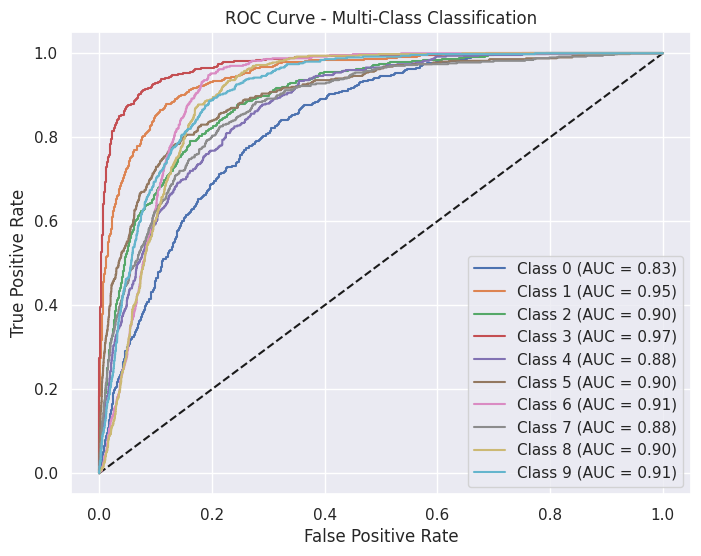

In [541]:
n_classes = len(model.classes_)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

# calculate ROC curve and AUC for each class
for i in range(n_classes):
    y_true_binary = np.where(y_test == model.classes_[i], 1, 0)
    y_pred_binary = y_pred[:, i]
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred_binary)
    roc_auc = auc(fpr, tpr)

    # plot ROC curve for the class
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

extra credit

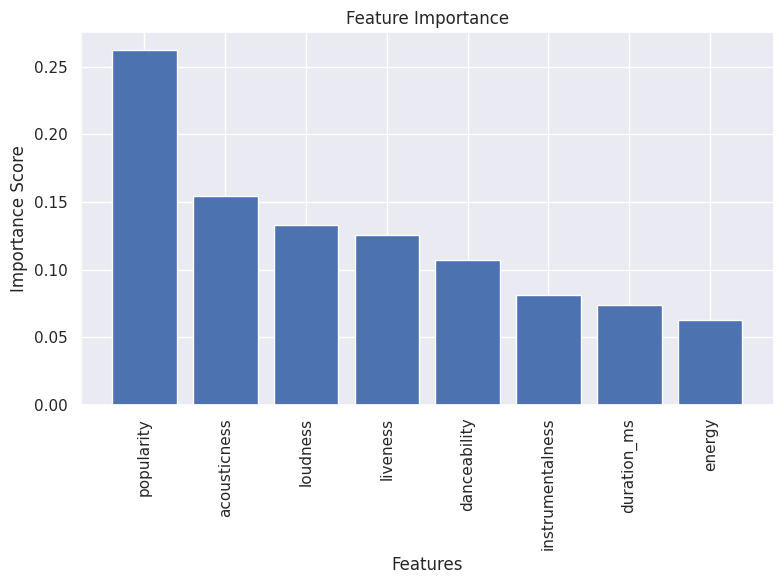

In [542]:
feature_importance = model.feature_importances_

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_idx]

feature_names = X_train.columns.tolist()

plt.figure(figsize=(8, 6))
plt.bar(range(X_train_pca.shape[1]), sorted_importance, tick_label=[feature_names[i] for i in sorted_idx])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


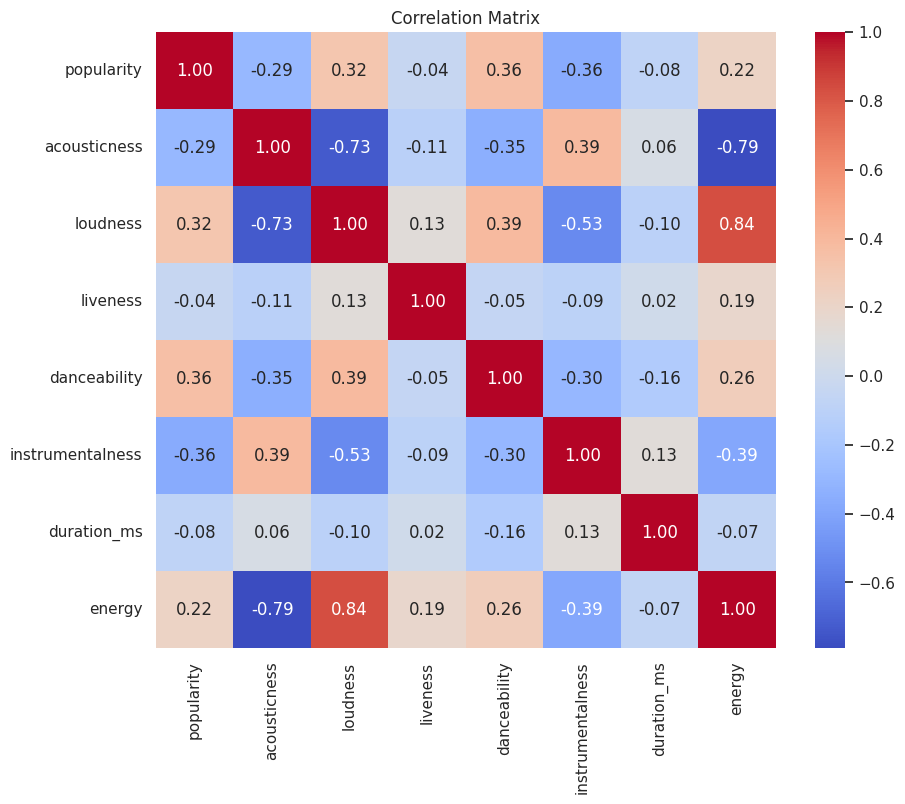

In [543]:
top_features = sorted(zip(data.columns, feature_importance), key=lambda x: x[1], reverse=True)[:11]
top_feature_names = [feature for feature, importance in top_features]
top_data = data[top_feature_names]
correlation_matrix = top_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()